<h1><b>Case: Cientista de Dados <img src="https://assets.bizneo.com/system/images/files/019/918/506/original/Logo-Geofusion_%286%29.png?1656694392" height=33 align="center" alt="Geofusion"></b></h1>

<small><i>Jéssica P. S. Cardoso (Novembro 2022)</i></small>

<hr color="lightgray" align="left" size=1/>

<p><strong>Definição do problema</strong></p>

<p align="justify">Uma empresa alimentícia situada no RJ deseja abrir filiais na cidade de São Paulo, tendo como público alvo adultos de 25 a 50 anos, das classes A (rendas A1 e A2) e B (rendas B1 e B2). Essa empresa já atua no Rio de Janeiro e antes de fazer o investimento quer estimar quanto poderia faturar em cada um dos bairros de São Paulo também. Como o mercado de São Paulo não é bem conhecido para essa empresa, ela deseja classificar os bairros de São Paulo para saber se o potencial é alto, médio ou baixo. Utilizando como base o potencial que
ela já conhece dos bairros do Rio de Janeiro.</p>
<p align="justify">Os analistas dessa empresa também gostariam de segmentar os bairros de São Paulo de acordo com o perfil de renda e idade para direcionar ações de marketing diferenciadas.</p>
<p align="justify">O contato dessa empresa também sinalizou que outras áreas da empresa possuem problemas muito parecidos com esse e que também
devem procurar a Geofusion. Internamente também temos recebido
feedback da equipe comercial e eles dizem que outros clientes também
estão procurando soluções como essa e que poderíamos utilizar as
mesmas técnicas para criar um produto que resolva esse tipo de
problema.</p>

<p><b>Dicionário dos dados:</b></p>

|Variável     | Descrição                           |
| :---        | :---                                |
|codigo       | Código do bairro                    |
|nome         | Nome do bairro                      |
|cidade       | Cidade                              |
|estado       | Estado                              |
|população    | População total                     |
|popAte9      | População - até 9 anos              |
|popDe10a14   | População - de 10 a 14 anos         |
|popDe15a19   | População - de 15 a 19 anos         |
|popDe20a24   | População - de 20 a 24 anos         |
|popDe25a34   | População - de 25 a 34 anos         |
|popDe35a49   | População - de 35 a 49 anos         |
|popDe50a59   | População - de 50 a 59 anos         |
|popMaisDe60  | População - 60 anos ou mais         |
|domiciliosA1 | Quantidade de Domicílios de Renda A1|
|domiciliosA2 | Quantidade de Domicílios de Renda A2|
|domiciliosB1 | Quantidade de Domicílios de Renda B1|
|domiciliosB2 | Quantidade de Domicílios de Renda B2|
|domiciliosC1 | Quantidade de Domicílios de Renda C1|
|domiciliosC2 | Quantidade de Domicílios de Renda C2|
|domiciliosD  | Quantidade de Domicílios de Renda D |
|domiciliosE  | Quantidade de Domicílios de Renda E |
|rendaMedia   | Renda Média por Domicílio           |
|faturamento  | Faturamento Total no Bairro         |
|potencial    | Potencial do Bairro                 |



<hr color="lightgray" align="left" size=1/>

<p align="justify">Neste notebook, pretendemos realizar a análise do conteúdo do conjunto de dados fornecido que contém o cadastro de 456 bairros, sendo 296 da cidade do Rio de Janeiro e 160 da capital São Paulo. Baseado nesta análise, desenvolvemos um modelo que permite selecionar os bairros de São Paulo que possuam maior faturamento, bem como maior potencial de consumo, tendo em vista o público alvo desejado.</p>

<hr color="lightgray" align="left" size=1/>



## 1. Preparo dos dados

O nosso conjunto de dados é composto por informações de 456 bairros, sendo 296 da cidade do Rio de Janeiro e 160 da capital São Paulo. Sobre essas cidades, temos 24 colunas, sendo `faturamento` e `potencial` as variáveis que queremos prever para São Paulo, nesse conjunto há 9 dados faltantes para o atributo `rendaMedia`.

In [1]:
#@markdown Carregamos os pacotes utilizados no notebook
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import patches
from matplotlib import cm
import matplotlib
import geopandas as gpd
import folium
from branca.colormap import linear
from IPython.display import display, HTML
import plotly.express as px

In [2]:
#@markdown 
df = pd.read_excel("/content/Dados/DadosDesafioCientista.xlsx", na_values=["-"])
df["potencial"] = df["potencial"].astype(
    pd.CategoricalDtype(categories=["Baixo", "Médio", "Alto"], ordered=True)
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   codigo        456 non-null    float64 
 1   nome          456 non-null    object  
 2   cidade        456 non-null    object  
 3   estado        456 non-null    object  
 4   população     456 non-null    float64 
 5   popAte9       456 non-null    float64 
 6   popDe10a14    456 non-null    float64 
 7   popDe15a19    456 non-null    float64 
 8   popDe20a24    456 non-null    float64 
 9   popDe25a34    456 non-null    float64 
 10  popDe35a49    456 non-null    float64 
 11  popDe50a59    456 non-null    float64 
 12  popMaisDe60   456 non-null    float64 
 13  domiciliosA1  456 non-null    float64 
 14  domiciliosA2  456 non-null    float64 
 15  domiciliosB1  456 non-null    float64 
 16  domiciliosB2  456 non-null    float64 
 17  domiciliosC1  456 non-null    float64 
 18  domicilios

In [3]:
#@markdown
display(df.head())
display(HTML("<hr/>"))
display(df.tail())

codigo               nome          cidade estado  população  popAte9  \
0  3.304557e+09           Abolição  Rio de Janeiro     RJ    11676.0   1027.0   
1  3.304557e+09              Acari  Rio de Janeiro     RJ    27564.0   5131.0   
2  3.304557e+09         Água Santa  Rio de Janeiro     RJ     9003.0    883.0   
3  3.304557e+09  Alto Da Boa Vista  Rio de Janeiro     RJ     9606.0   1072.0   
4  3.304557e+09           Anchieta  Rio de Janeiro     RJ    57222.0   7677.0   

   popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
0       483.0       688.0       800.0      1675.0  ...         145.0   
1      2188.0      2697.0      2630.0      4810.0  ...           0.0   
2       399.0       597.0       762.0      1755.0  ...          96.0   
3       538.0       660.0       685.0      1317.0  ...         178.0   
4      3774.0      4892.0      4600.0      8660.0  ...           0.0   

   domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
0         715.0        1242.0        1093.0         758.0         92.0   
1          82.0         506.0        2040.0        2490.0        827.0   
2         404.0         652.0         644.0         522.0         77.0   
3         393.0         517.0         945.0         584.0        137.0   
4        1089.0        2821.0        5110.0        5422.0       1073.0   

   domiciliosE  rendaMedia  faturamento  potencial  
0        304.0      2501.0     932515.0      Médio  
1       2506.0       931.0     588833.0      Baixo  
2        254.0      2391.0     874200.0      Baixo  
3        286.0      3727.0     912226.0      Médio  
4       3261.0      1380.0     553020.0      Médio  

[5 rows x 24 columns]

codigo            nome     cidade estado  população  popAte9  \
451  355030213.0      Vila Sônia  São Paulo     SP    34061.0   2908.0   
452  355030207.0     Vila Suzana  São Paulo     SP    35403.0   4127.0   
453  355030162.0  Vila Terezinha  São Paulo     SP   122359.0  18304.0   
454  355030157.0       Vila Zatt  São Paulo     SP   125864.0  14670.0   
455  355030164.0    Vista Alegre  São Paulo     SP      106.0     23.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
451      1462.0      2253.0      2076.0      4579.0  ...        1089.0   
452      1890.0      2678.0      2433.0      5855.0  ...        1522.0   
453      9304.0     13258.0      9965.0     19248.0  ...           0.0   
454      7305.0     11225.0      9338.0     18841.0  ...         872.0   
455         7.0        15.0        11.0        15.0  ...           0.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
451        2866.0        2219.0        2216.0        1227.0        306.0   
452        2458.0        1186.0        1166.0         918.0        209.0   
453        1758.0        4517.0        9450.0       11473.0       3218.0   
454        5093.0        8063.0       10012.0        8082.0       2856.0   
455           0.0           6.0           9.0           8.0          2.0   

     domiciliosE  rendaMedia  faturamento  potencial  
451       1098.0      5285.0          NaN        NaN  
452       3840.0      7418.0          NaN        NaN  
453       7540.0      1252.0          NaN        NaN  
454       6853.0      1936.0          NaN        NaN  
455          4.0      1288.0          NaN        NaN  

[5 rows x 24 columns]

A partir do método describe do pandas, podemos ter uma visão geral da base de dados. Desse modo, vemos que:

- Os bairros possuem uma população média de aproxidamente 41.356 habitantes, sendo a média da `rendaMedia` no valor de R\$ 3.900.
- O faturamento médio se encontra em R\$ 87.6160,0
- Com relação ao número de domicílios na média por classe temos:
 - Em ordem: C1, C2, B2, E, B1, D, A2, A1
- A maior renda média registrada foi de R\$63.887

In [4]:
#@markdown
display(df.drop(columns=["codigo"]).describe())
display(HTML("<hr/>"))
display(df.describe(include=[np.object_, "category"]))

população        popAte9    popDe10a14    popDe15a19    popDe20a24  \
count     456.000000     456.000000    456.000000    456.000000    456.000000   
mean    41355.605263    5005.274123   2406.013158   3475.328947   3135.839912   
std     47188.920422    7655.796985   3617.925729   4571.058622   4030.380079   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%     14616.750000    1324.000000    604.250000    956.000000   1006.000000   
50%     30352.000000    3074.000000   1434.000000   2173.000000   2196.000000   
75%     50879.250000    5962.000000   2884.000000   4307.500000   3762.750000   
max    667603.000000  122578.000000  55935.000000  62342.000000  60567.000000   

         popDe25a34     popDe35a49    popDe50a59   popMaisDe60  domiciliosA1  \
count    456.000000     456.000000    456.000000    456.000000    456.000000   
mean    6491.019737    9028.614035   5169.234649   6644.280702    405.583333   
std     7012.670205    9277.870455   5676.876617   6929.255870   1044.795780   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%     2273.500000    3245.250000   1918.500000   2708.750000      0.000000   
50%     4774.000000    6710.500000   3951.500000   5264.500000      0.000000   
75%     7828.500000   11272.750000   6620.500000   8745.500000    345.250000   
max    86116.000000  105316.000000  83341.000000  91408.000000  13408.000000   

       domiciliosA2  domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  \
count    456.000000    456.000000    456.000000    456.000000    456.000000   
mean     580.782895   1897.436404   2297.436404   3161.679825   2788.192982   
std     1074.031736   2130.830989   2138.179024   3453.936815   3441.066392   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000    559.750000    841.250000    934.000000    554.750000   
50%      198.500000   1334.000000   1833.000000   2229.000000   1632.500000   
75%      757.500000   2500.500000   3222.250000   4153.250000   3679.500000   
max    11668.000000  19350.000000  21237.000000  33111.000000  25779.000000   

       domiciliosD  domiciliosE    rendaMedia   faturamento  
count   456.000000    456.00000    447.000000  1.600000e+02  
mean    689.153509   2191.58114   3900.123043  8.761600e+05  
std     948.425756   2380.59873   4599.089251  4.382106e+05  
min       0.000000      0.00000    654.000000  2.465100e+04  
25%      96.500000    557.75000   1530.500000  7.112785e+05  
50%     348.500000   1494.50000   2134.000000  8.242285e+05  
75%     825.500000   2863.75000   4679.500000  9.343208e+05  
max    6680.000000  15001.00000  63887.000000  2.915612e+06

nome     cidade estado potencial
count      456        456    456       160
unique     447          2      2         3
top     Grajaú  São Paulo     SP     Baixo
freq         2        296    296        62

As colunas `codigo`, `bairro`, `cidade` e `estado` possuem propósito de identificação, a única repetição está no nome, pois em ambas cidades há um bairro chamado Grajaú. A maioria dos bairros do Rio de Janeiro possui potencial baixo, 62 dos 160.

## 2. Explorando variáveis

O conjunto de dados possui 24 variáveis, onde população corresponde a soma das populações por faixa etária. Dentre as variáveis categóricas, a variável de interesse que temos é a variável alvo potencial, cidade ou estado são usadas para comparar as duas populações.

### 2.1 Variáveis categóricas

Primeiro vemos como está distribuído o conjunto de dado por cidade e por potencial.

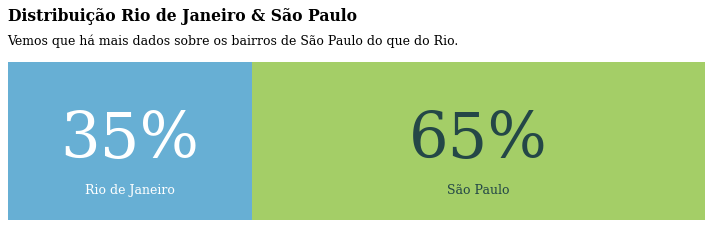

In [5]:
#@markdown
def plot_ratio_rj_sp(df):
    x = df.groupby(["cidade"])["cidade"].count()
    y = df.shape[0]
    r = ((x/y)).round(2)

    rj_sp_ratio = pd.DataFrame(r).T
    
    fig, ax = plt.subplots(1,1,figsize=(12, 3), dpi=75)

    # Barras com as distribuições
    ax.barh(rj_sp_ratio.index, rj_sp_ratio["Rio de Janeiro"], 
            color="#268EC2", alpha=0.7, label="Rio de Janeiro")
    ax.barh(rj_sp_ratio.index, rj_sp_ratio["São Paulo"], left=rj_sp_ratio["Rio de Janeiro"], 
            color="#7EBA27", alpha=0.7, label="São Paulo")

    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # Percentual do Rio de Janeiro
    xy = rj_sp_ratio["Rio de Janeiro"]['cidade'] / 2
    ax.annotate(
        f"{int(rj_sp_ratio['Rio de Janeiro']['cidade']*100)}%", 
        xy=(xy, "cidade"),
        va = "center",
        ha="center",
        fontsize=60, 
        fontweight="light", 
        fontfamily="serif",
        color="white"
    )

    ax.annotate(
        "Rio de Janeiro", 
        xy=(xy, -0.25),
        va = "center", 
        ha="center",
        fontsize=12, 
        fontweight="light", 
        fontfamily="serif",
        color="white"
    )

    # Percentual de São Paulo
    xy = rj_sp_ratio["Rio de Janeiro"]["cidade"] + rj_sp_ratio["São Paulo"]["cidade"]/2
    ax.annotate(
        f"{int(rj_sp_ratio['São Paulo']['cidade']*100)}%", 
        xy=(xy, "cidade"),
        va = "center", 
        ha="center",
        fontsize=60, 
        fontweight="light", 
        fontfamily="serif",
        color="#244747"
    )
    ax.annotate(
        "São Paulo", 
        xy=(xy, -0.25),
        va = "center", 
        ha="center",
        fontsize=12, 
        fontweight="light", 
        fontfamily="serif",
        color="#244747"
    )


    fig.text(
        0.125,1.03,
        "Distribuição Rio de Janeiro & São Paulo", 
        fontfamily="serif",
        fontsize=15, 
        fontweight="bold"
    )
    fig.text(
        0.125,0.92,
        "Vemos que há mais dados sobre os bairros de São Paulo do que do Rio.",
        fontfamily="serif",
        fontsize=12
    )  

    for s in ["top", "left", "right", "bottom"]:
        ax.spines[s].set_visible(False)

    ax.legend().set_visible(False)
    plt.show()

plot_ratio_rj_sp(df)

Dentre as classes de interesse, vemos que a maioria dos bairros possui potencial de consumo baixo, sendo que cerca de 50 possui potencial alto. De acordo com a definição problema, o público alvo consiste em pessoas que estejam nas classes A1 até B1, então é esperado que haja mais bairros onde o potencial é baixo, dado a fatia populacional considerada.

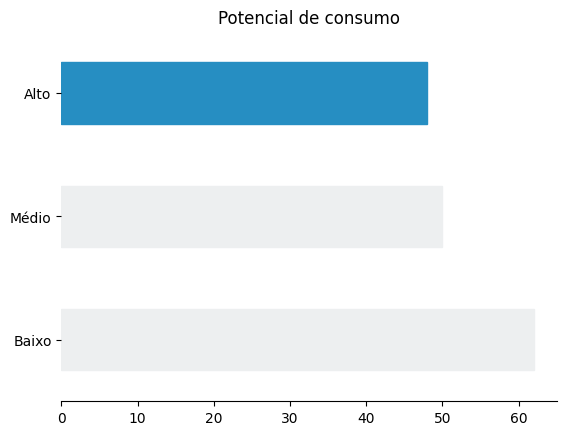

In [6]:
#@markdown
ax =  df.groupby("potencial").size().plot(kind="barh")
ax.set_ylabel("")
for color, bar in zip(["#edeff0", "#edeff0", "#268EC2"], ax.patches):
  bar.set_color(color)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

ax.set_title("Potencial de consumo")
plt.show()

### 2.2 Variáveis Numéricas


No primeiro momento, definimos faixas de idade e classe social. 

- **faixa etária**
 - jovem: Até 24 anos
 - adulto: De 25 até 59 anos
 - idoso: A partir de 60 anos

- **classe social**
 - baixa: D e E
 - média: C1 e C2
 - Alta: A1, A2, B1 e B2 

Vemos que a distribuição de jovens, adultos e idosos são similares entre o Rio e São Paulo. Além da faixa etária, há uma similaridade também na distribuição das classes sociais

In [7]:
#@markdown pipe
def start_pipeline(dataf):
    return dataf.copy()

def add_age_range(dataf):
  return dataf.assign(
      jovem=lambda d: d.loc[:, "popAte9":"popDe20a24"].sum(axis=1),
      adulto=lambda d: d.loc[:, "popDe25a34":"popDe50a59"].sum(axis=1),
      idoso=lambda d: d["popMaisDe60"]
  )

def add_income_range(dataf):
  return dataf.assign(
      alta=lambda d: d.loc[:, "domiciliosA1":"domiciliosB2"].sum(axis=1),
      media=lambda d: d.loc[:, "domiciliosC1":"domiciliosC2"].sum(axis=1),
      baixa=lambda d: d.loc[:,"domiciliosD":"domiciliosE"].sum(axis=1)
  )

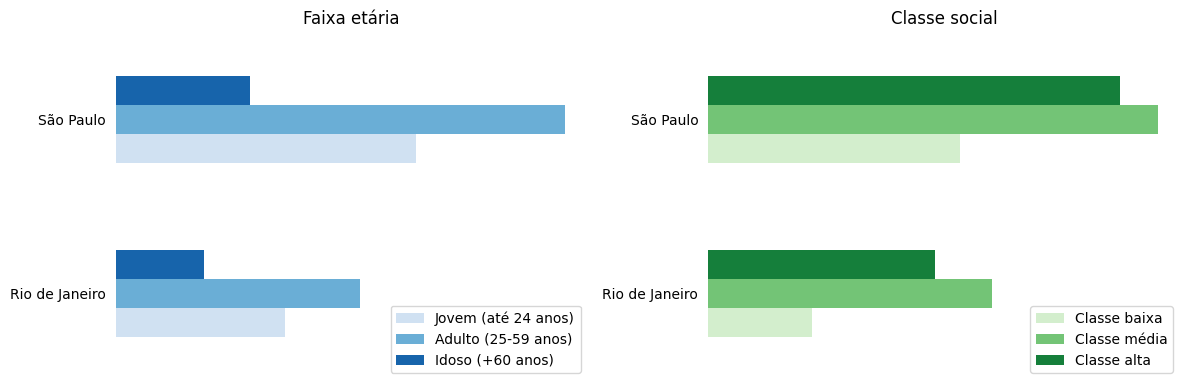

In [8]:
#@markdown
fig, axes = plt.subplots(1,2, figsize=(12, 4))

for ax, title, func, columns, colors,  in zip(
    axes,
    ["Faixa etária", "Classe social"],
    [add_age_range, add_income_range],
    [
        ["cidade", "jovem", "adulto", "idoso"],
        ["cidade", "baixa", "media", "alta"]
    ],
    [
        cm.Blues(np.linspace(0.2, 0.8, 3)), 
        cm.Greens(np.linspace(0.2, 0.8, 3))
    ]

):
    (df
      .pipe(start_pipeline)
      .pipe(func)[columns]
      .groupby("cidade").sum()
      .plot(kind="barh", color=colors, ax=ax)
    )

    ax.set_title(title)

    # Remover elementos extras
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)
    for _, spine in ax.spines.items():
      spine.set_visible(False)

axes[0].legend(
    ["Jovem (até 24 anos)", "Adulto (25-59 anos)", "Idoso (+60 anos)"]
)
axes[1].legend(
    ["Classe baixa", "Classe média", "Classe alta"]
)
fig.tight_layout()
plt.show()

#### 2.2.1 Correlação entre variáveis


Há dois tipos de correlação, a positiva e a negativa, para visualizarmos melhor o quão correlacionadas são essas medidas utilizaremos o coeficiente de correlação de Pearson — também conhecido como Pearson's r. Esse coeficiente varia de -1.00 a +1.00. Quando há uma correlação positiva perfeita assume o valor de +1.00. Quando a correlação negativa é perfeita assume o valor de -1.00. Um valor igual a 0.00 indica que não existe correlação entre as variáveis.

Abaixo, vemos vários diagramas de dispersão e seus respectivos coeficientes de Pearson.

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png"/>

<small>Imagem retirada de https://en.wikipedia.org/wiki/Correlation</small>
</div>

Na Tabela a seguir há a interpretação dos valores do coeficiente de correlação de Pearson.

<div align="center">
<img src="https://minio.scielo.br/documentstore/1982-4351/pD8ZJN9LPWZjxyg9Nn7KSYQ/00a1935b704e192ea9d084bb90a8327a421142e9.jpg"/>

<small>Tabela retirada de https://doi.org/10.1590/0102-778620130079</small>
</div>

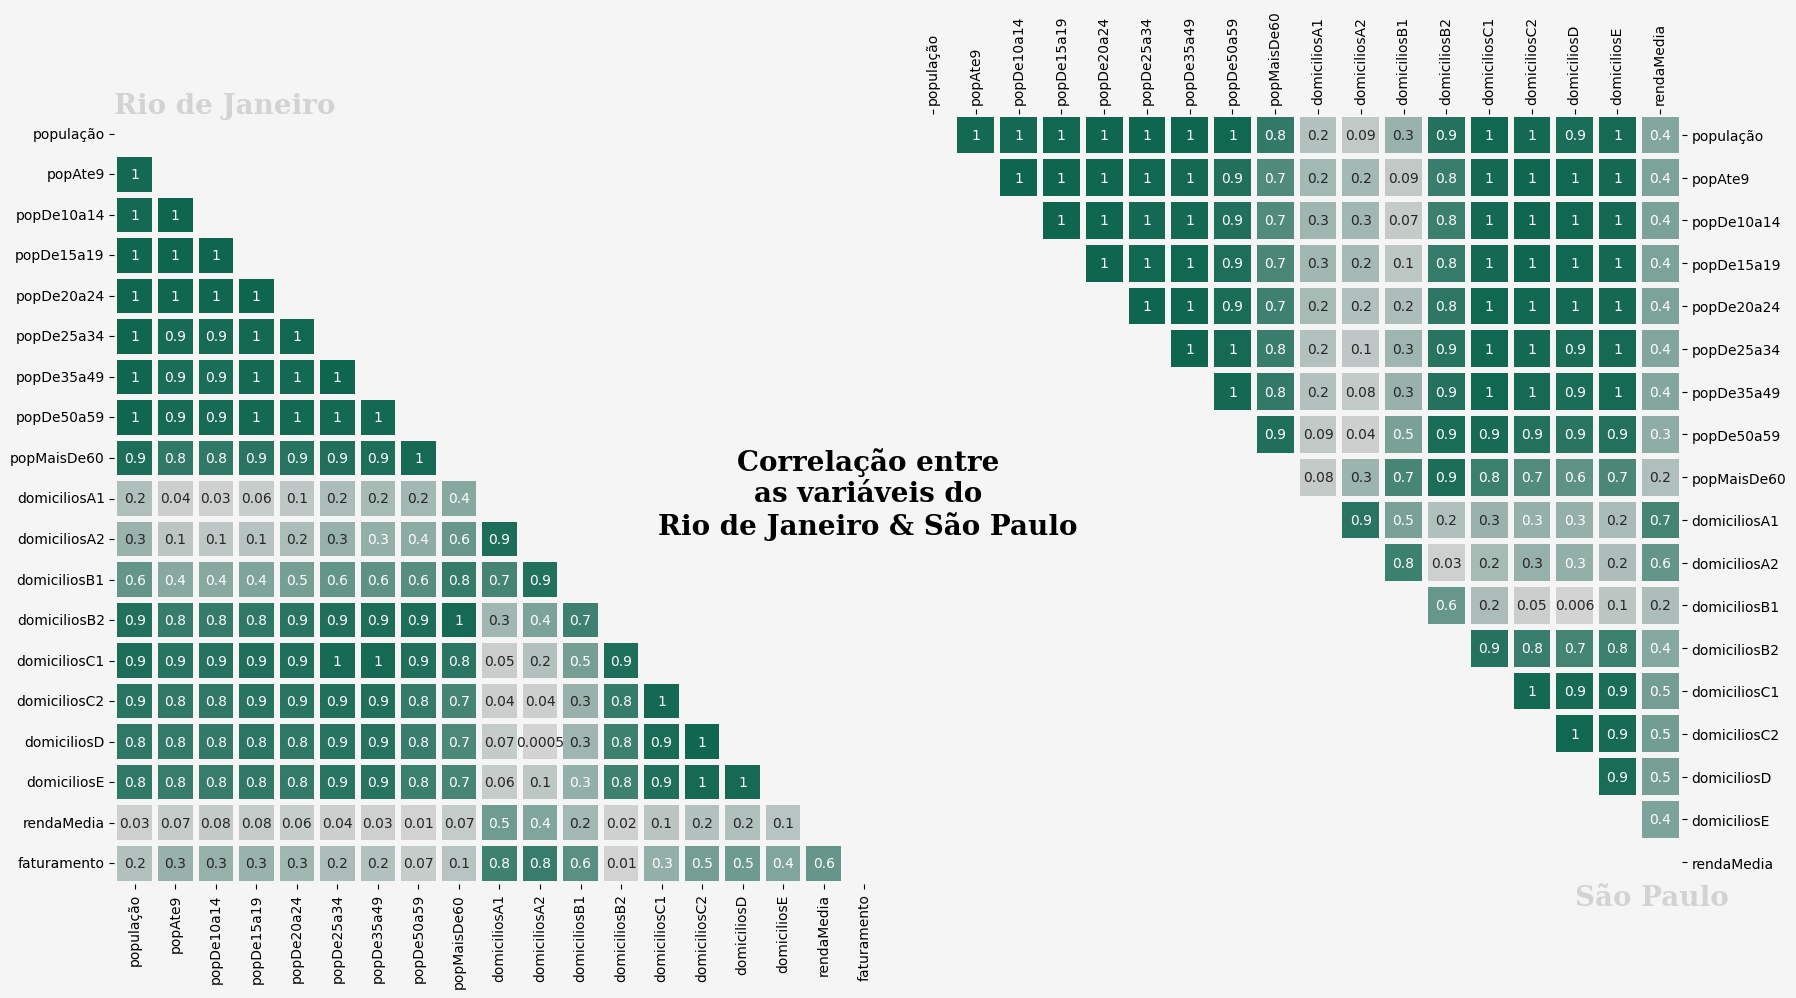

In [9]:
#@markdown
background_color = "#f6f5f5"

fig = plt.figure(figsize=(24, 10), facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=-0.25, hspace=0.25)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

colors = ["#fbfbfb", "lightgray","#0e664f"]

colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(
    0, 0, 
    "Rio de Janeiro", 
    fontsize=20, 
    fontweight="bold", 
    fontfamily="serif", 
    color="lightgray"
)

ax1.set_facecolor(background_color)
ax1.text(
    15.5, 18.5, 
    "São Paulo", 
    fontsize=20, 
    fontweight="bold", 
    fontfamily="serif", 
    color="lightgray"
)


fig.text(
    0.5,0.5,
    "Correlação entre\nas variáveis do\nRio de Janeiro & São Paulo", 
    fontsize=20, 
    fontweight="bold", 
    fontfamily="serif",
    va="center",
    ha="center"
)

corr = (df
        .query("cidade == 'Rio de Janeiro'").
        drop(columns=["codigo"])
        .corr()
        .abs()
)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, ax=ax0, vmin=-1, vmax=1, annot=True, square=True, mask=mask,
    cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, 
    fmt=".1g",linewidth=3,linecolor=background_color
)


corr = (df
        .query("cidade == 'São Paulo'").
        drop(columns=["codigo", "faturamento"])
        .corr()
        .abs()
)
mask = np.tril(corr)
sns.heatmap(
    corr, ax=ax1, vmin=-1, vmax=1, annot=True, square=True, mask=mask,
    cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, 
    fmt=".1g",linewidth=3,linecolor=background_color
)

ax1.xaxis.tick_top()
ax1.yaxis.tick_right()
ax1.tick_params(axis="x", labelrotation=90)
ax1.tick_params(axis="y", labelrotation=0)

plt.show()

No Rio de Janeiro, possuímos os valores da variável faturamento, e podemos notar que a há uma **correlação positiva forte com os domicílios da classe A1 e moderada com os domicílios das classes B2, C2, D e E**. **A renda média também possui correlação moderada com o faturamento**.

Além disso, vemos também que muitas variáveis possuem alta correlação positiva entre si, tanto no Rio quanto em São Paulo, por exemplo, as faixas de idades ou os domicílios por renda.

#### 2.2.2 Análise do público alvo de interesse

O cliente almeja como público alvo, pessoas das classes A e B, além da faixa etária entre 25-50 anos. Entretanto, a faixa que contém a idade de 50 anos vai até 59, então nessa análise é considerado um range maior de idades.

In [10]:
#@markdown
columns_of_interest = [
   "domiciliosA1", "domiciliosA2",
    "domiciliosB1", "domiciliosB2",
    "popDe25a34", "popDe35a49", "popDe50a59"
]

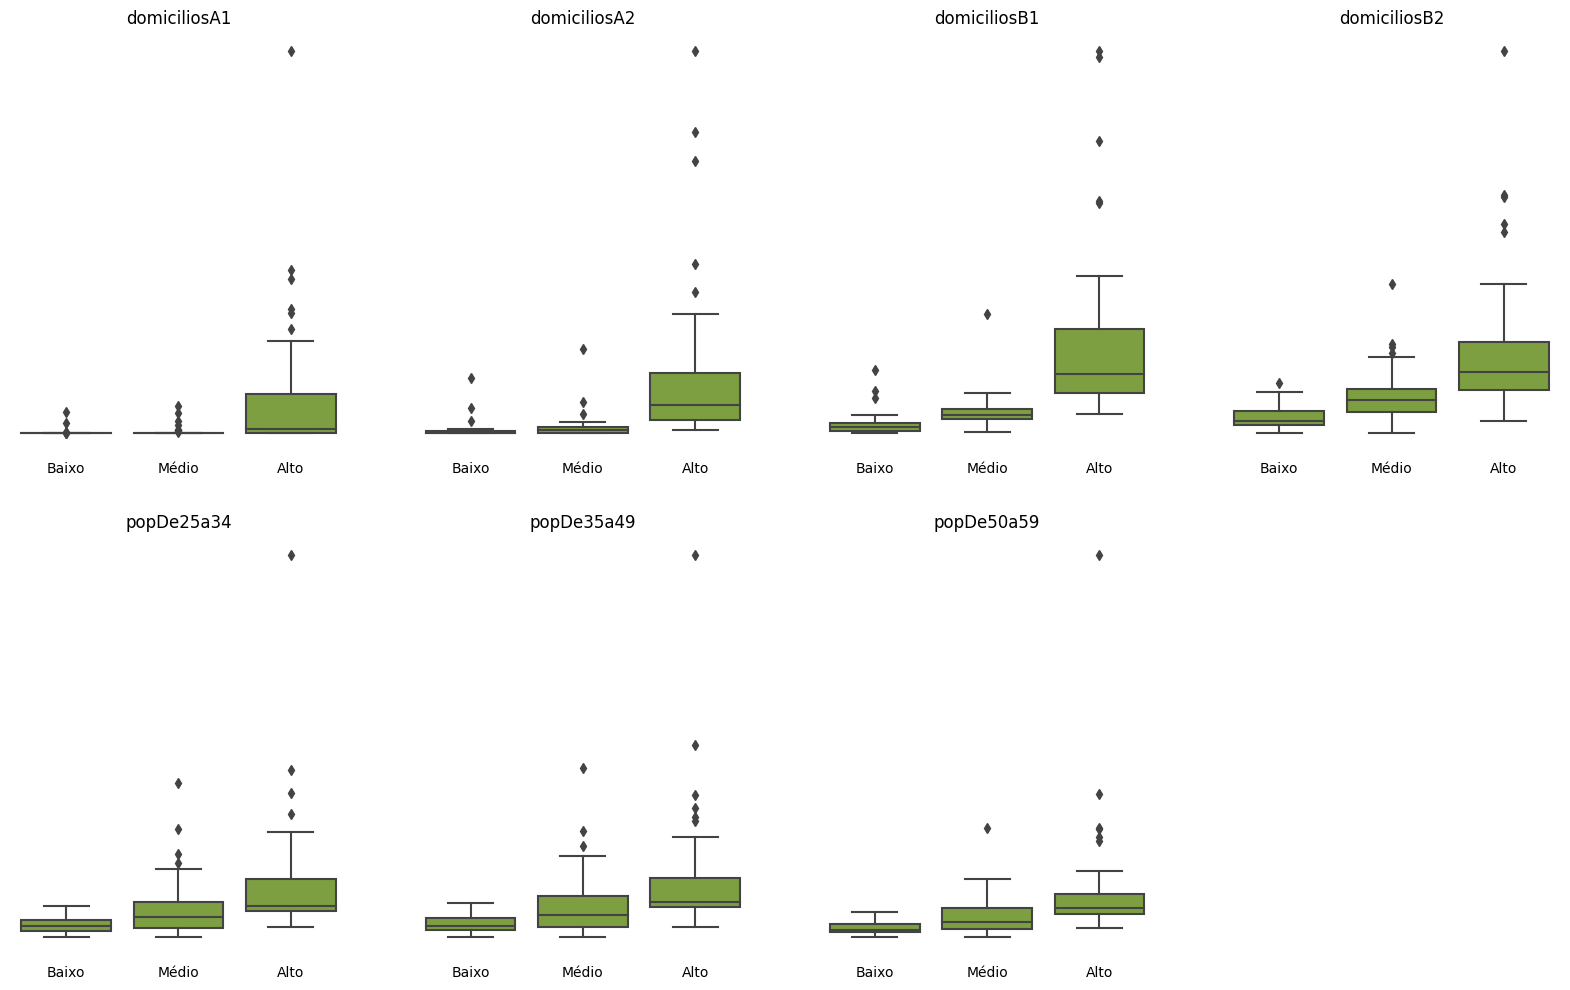

In [11]:
#@markdown
fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(nrows=2, ncols=4, figure=fig)

for colname, spec in zip(columns_of_interest, specs):
  ax = fig.add_subplot(spec)
  sns.boxplot(y=colname,x = "potencial", data = df.query("cidade == 'Rio de Janeiro'"), ax=ax, color="#82ad32")
  ax.set_title(colname)
  ax.set_xlabel("")
  ax.set_ylabel("")
  ax.set_yticklabels([])
  ax.tick_params(bottom=False, left=False)
  for key, spine in ax.spines.items():
    spine.set_visible(False)

display(HTML("<h3>Análise Rio de Janeiro</h3><br/>"))
plt.show()

Vemos que os dados para na categoria de classes são positivamente assimétricos para o potencial alto, ou seja, a maioria das pessoas nesse grupo de contribuem para um potencial alto como esperado. Além disso vemos a presença de muitos outliers nesses grupos.

Com relação a faixa etária, vemos que também uma assimetria positiva no potencial alto, e uma simetria no potencial médio para a faixa etária de 25 a 34 anos.

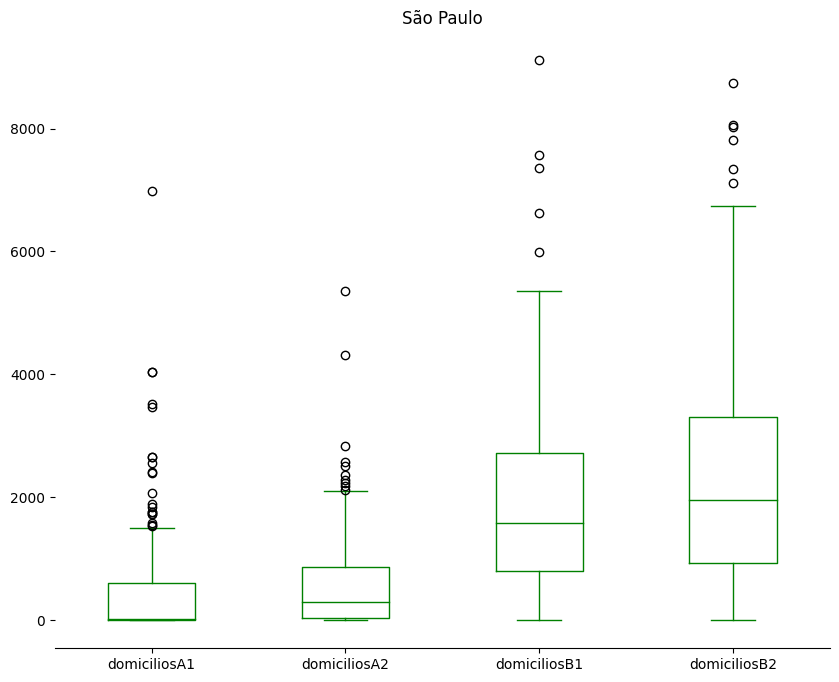

In [12]:
#@markdown
ax =  df.query("cidade == 'São Paulo'")[columns_of_interest[:4]].plot(
    kind="box", figsize=(10,8), color="green"
)
ax.set_ylabel("")

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

ax.set_title("São Paulo")
plt.show()

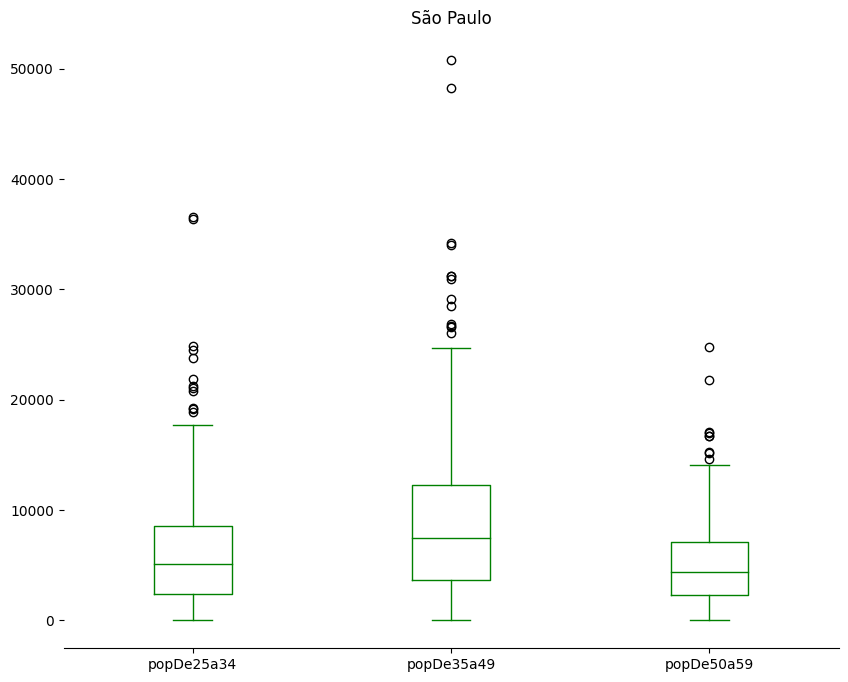

In [13]:
#@markdown
ax =  df.query("cidade == 'São Paulo'")[columns_of_interest[4:]].plot(
    kind="box", figsize=(10,8), color="green"
)
ax.set_ylabel("")

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

ax.set_title("São Paulo")
plt.show()

Para a cidade de São Paulo, como não temos a variável de faturamento, realizamos o plot de caixa para verificar a distribuição dos dados de São Paulo, o qual vemos uma distribuição simétrica levemente positiva na faixa etária e domicílios B1 e B2. Além disso vemos uma presença bem significante de outliers. 

In [14]:
#@title Bairros com maior aderência (São Paulo)
#@markdown Bairros ordenados pela quantidade de domicílios de classe A1-B1
#@markdown seguida pela quantidade de adultos entre 25-59 anos.
(df
      .query("cidade == 'São Paulo'")
      .pipe(start_pipeline)
      .pipe(add_age_range)
      .pipe(add_income_range)[["nome", "adulto", "alta", "população"]]
      .sort_values(["alta", "adulto"], ascending=False)
      .head(10)
)

nome   adulto     alta  população
318             Moema  34245.0  21456.0    60709.0
311          Mandaqui  56711.0  19710.0   108235.0
382            Sacomã  68975.0  17394.0   131007.0
359          Perdizes  26011.0  16520.0    47046.0
395             Saúde  30515.0  15445.0    55175.0
454         Vila Zatt  64041.0  14036.0   125864.0
436      Vila Mariana  20180.0  12940.0    38935.0
398           Tatuapé  26754.0  12604.0    51812.0
314  Marechal Deodoro  22756.0  12296.0    43550.0
403           Trianon  16816.0  12068.0    32963.0

#### 2.2.1 Análise bairros do Rio

**Top-10 bairros com maior faturamento (potencial alto)**

A seguir exibimos os bairros cujo potencial seja alto, onde houve maior faturamento da franquia. Notamos que a maioria dos bairros estão localizados na Zona Sul carioca, exceto Barra da Tijuca (Zona Oeste), Méier (Zona Norte) e Tijuca (Zona Norte). 

 

In [15]:
#@markdown
(df
 .query("potencial == 'Alto'")
 .sort_values("faturamento", ascending=False)
 .head(10)[["nome", "população", "rendaMedia", "faturamento", "potencial"]]
)

nome  população  rendaMedia  faturamento potencial
9    Barra Da Tijuca   139761.0     18084.0    2915612.0      Alto
36        Copacabana   150524.0      7381.0    2384494.0      Alto
15          Botafogo    85229.0      8316.0    2211985.0      Alto
141           Tijuca   168267.0      7844.0    2157079.0      Alto
82            Leblon    47342.0     14738.0    2119774.0      Alto
50          Flamengo    51456.0     10619.0    1981817.0      Alto
68           Ipanema    43948.0     17188.0    1962438.0      Alto
80             Lagoa    21795.0     63887.0    1775547.0      Alto
81       Laranjeiras    46839.0      8980.0    1762798.0      Alto
93             Méier    51234.0      4671.0    1626856.0      Alto

**Bairros com maiores rendimentos (alto e baixo)**

Ao realizar uma consulta, maioria dos bairros com maior faturamento estão localizados na Zona Sul carioca.

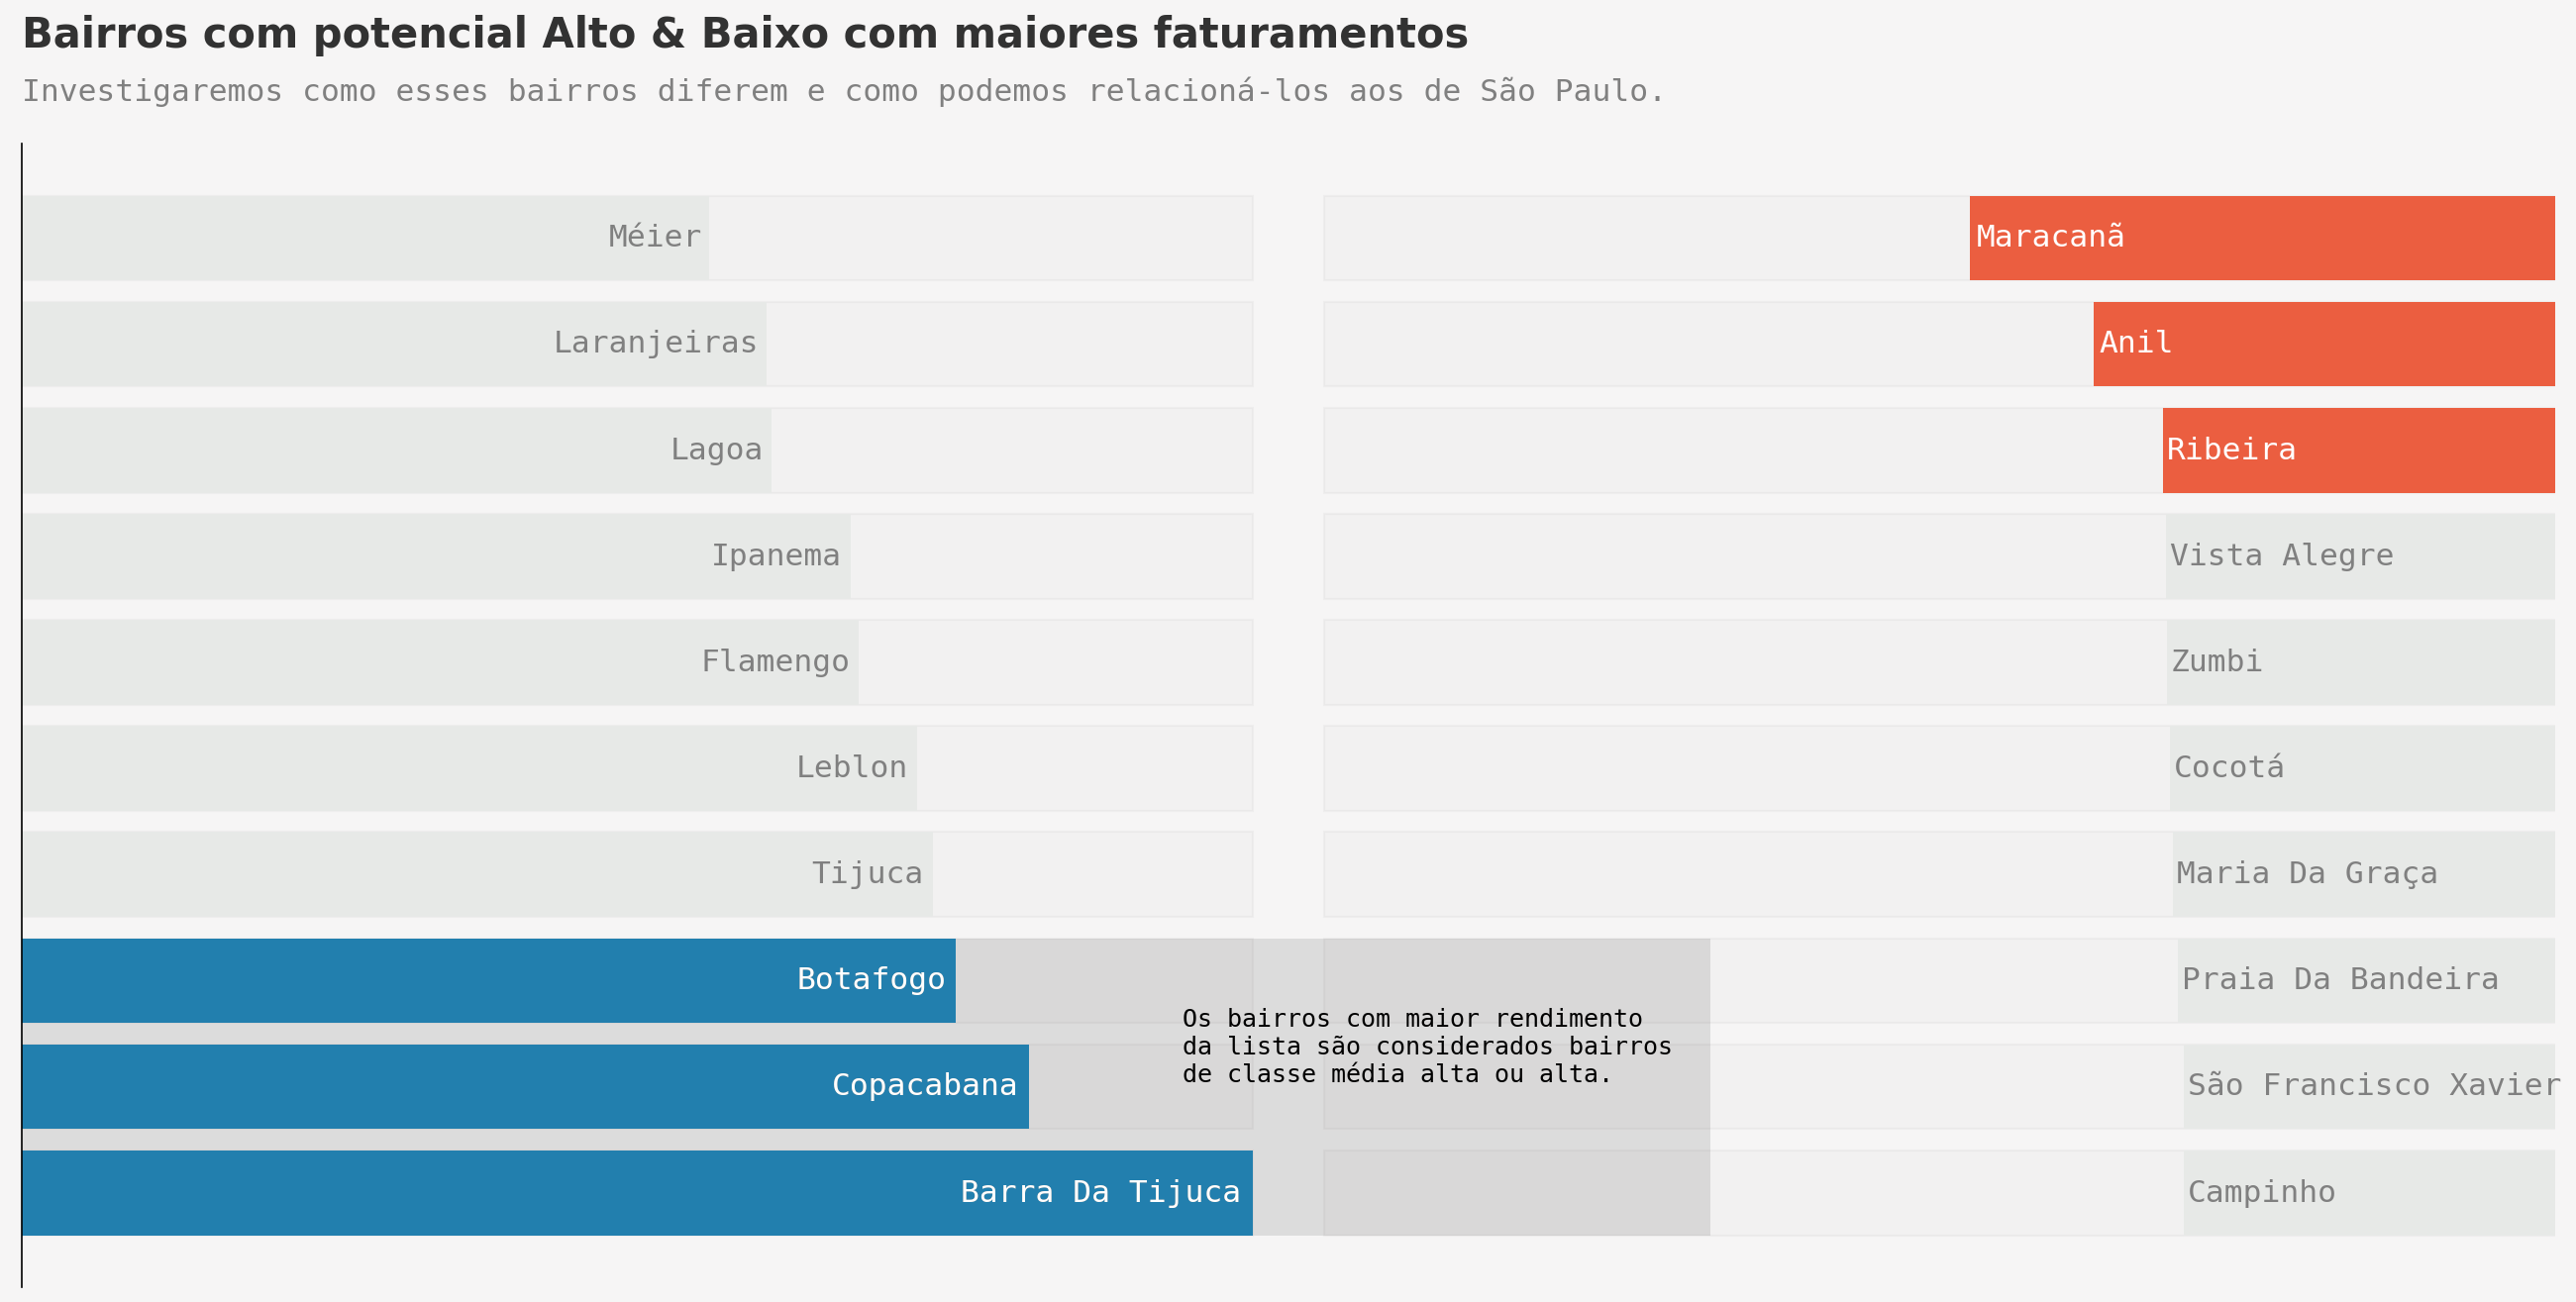

In [16]:
#@markdown
fig = plt.figure(figsize=(22,10),dpi=150)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


low_c = "#EB5E40"
high_c = "#268EC2"

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 


# ------ Potencial Alto -----------
data = df.query(
    "potencial == 'Alto'"
).set_index("nome")["faturamento"].sort_values(ascending=False).head(10)
max_x = data.iloc[0]

color_map = ["#e7e9e7" for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  high_c

#base
ax0.barh(data.index, max_x, 
       edgecolor="darkgray",color="lightgray",alpha=0.1)
# dados
ax0.barh(data.index, data,color=color_map)

# Nome dos bairros
for idx, (name, value) in enumerate(data.iteritems()):
  ax0.annotate(
      name,
      xy=(value-(value*0.01), idx),
      va = "center", 
      ha="right",
      fontweight="light", 
      fontfamily="monospace",
      fontsize=15, 
      color="gray",
      rotation=0
  )
  
for idx, (name, value) in enumerate(data[:3].iteritems()):
    ax0.annotate(
        name, 
        xy=(value-(value*0.01), idx), 
        va = "center", 
        ha="right",
        fontweight="light", 
        fontfamily="monospace",
        fontsize=15, 
        color="white",
        rotation=0
    )
# ------ Potencial Baixo -----------

data = df.query(
    "potencial == 'Baixo'"
).set_index("nome")["faturamento"].sort_values(ascending=True).tail(10)

color_map = ["#e7e9e7" for _ in range(10)]
color_map[-1] = color_map[-2] = color_map[-3] =  low_c

#base
ax1.barh(data.index, max_x, 
       edgecolor="darkgray",color="lightgray",alpha=0.1)
# dados
ax1.barh(data.index, data, color=color_map)

# Nome dos bairros

for idx, (name, value) in enumerate(data[-3:].iteritems(), 7):
    ax1.annotate(
        name, 
        xy=(value-(value*0.01), idx), 
        va = "center", 
        ha="left",
        fontweight="light", 
        fontfamily="monospace",
        fontsize=15, 
        color="white",
        rotation=0
    )

for idx, (name, value) in enumerate(data[:-3].iteritems()):
    ax1.annotate(
        name, 
        xy=(value-(value*0.01), idx),
        va = "center", 
        ha="left",
        fontweight="light", 
        fontfamily="monospace",
        fontsize=15, 
        color="gray",
        rotation=0
)
    
# --------------- Limpeza do gráfico -------------------
for s in ["top", "bottom", "right"]:
    ax0.spines[s].set_visible(False)
    
for s in ["top", "bottom", "right","left"]:    
    ax1.spines[s].set_visible(False)
    
ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])


# ----------------- Ajustes do gráfico ------------
ax0.set_xlim(0,3_000_000)
ax1.set_xlim(3_000_000, 0)

# Destacar região
rect = patches.Rectangle(
    (0, -0.40), 3_100_000, 2.8, alpha=0.1, linewidth=1, facecolor="black"
)
ax0.add_patch(rect)

rect = patches.Rectangle(
    (2_000_000, -0.40), 3_100_000, 2.8, alpha=0.1, linewidth=1, facecolor="black"
)
ax1.add_patch(rect)


# Textos descritivos
ax0.text(
    0,10.8,
    "Bairros com potencial Alto & Baixo com maiores faturamentos",
    fontfamily="sans-serif",
    fontsize=20,
    fontweight="bold",
    color="#323232"
)
ax0.text(
    0,10.3,
    "Investigaremos como esses bairros diferem e como podemos relacioná-los aos de São Paulo.",
    fontfamily="monospace",
    fontsize=15,
    fontweight="light",
    color="gray"
)

fig.text(0.48, 0.23,    
"""
Os bairros com maior rendimento
da lista são considerados bairros 
de classe média alta ou alta.
""",color="black",fontfamily="monospace",fontsize=12)

plt.show()

##### 2.2.1.1 Análise regional

Dado o comportamento observado, continuamos nossas análises não observando apenas o bairro, mas a região que ele está contido. A cidade do Rio de Janeiro possui 164 bairros que são agrupados em 33 regiões administrativas [(1)](https://www.data.rio/documents/PCRJ::regi%C3%B5es-de-planejamento-rp-regi%C3%B5es-administrativas-ra-e-bairros-do-munic%C3%ADpio-do-rio-de-janeiro/about) e 8 subprefeituras [(2)](http://www.rio.rj.gov.br/web/gbp/exibir-conteudo?id=12388610). Podemos usar as informações de bairros da mesma região administrativa para estimar a renda média dos bairros faltantes. Para isso baixamos os [limites de bairros](https://www.data.rio/datasets/PCRJ::limite-de-bairros/explore) das regiões administrativas que contém informações sobre as regiões desse munícipio.

In [17]:
#@markdown
zipfile = "zip:///content/Dados/rio-de-janeiro/Limite_de_Bairros.zip"
rio_gdf = (
    gpd.read_file(zipfile)
    .assign(
        # Renomear os nomes que não são similares ao nosso caso de estudo
        nome=lambda d: d["nome"].replace(
            "Freguesia (Ilha)", "Freguesia (Ilha do Governador)"
        ).replace(
            "Osvaldo Cruz", "Oswaldo Cruz"
        ).replace(
            "Parque Colúmbia", "Parque Columbia"
        ).replace(
            "Turiaçú", "Turiaçu"
        )
      )
    # Realizar a junção dos dados externos com nossa base
    .assign(nome_lower = lambda d: d.nome.str.lower())
    .merge(
      df.query("cidade == 'Rio de Janeiro'").assign(
          nome_lower = lambda d: d.nome.str.lower()
      ), 
      left_on="nome_lower", 
      right_on="nome_lower"
    )
    # renomear e remover colunas auxiliares
    .rename({"nome_y": "nome"}, axis=1)
    .drop(["nome_x", "nome_lower"], axis=1)
)[df.columns.tolist() + ["regiao_adm", "rp", "geometry"]]

# Mudar sistema de coordenadas para lat/lon
rio_gdf = rio_gdf.to_crs(epsg=4326)
rio_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Os bairros com informação faltante, possuem em sua maioria um potencial baixo, eles estão nas seguintes regiões de administrativa:

- Meier
 - Jacaré
- Jacarepaguá
 - Freguesia (Jacarepaguá)
 -  Anil
- Vila Isabel
 - Maracanã
- Rio Comprido
 - Rio Comprido
 - Catumbi


Desse modo decidimos, realizar o preenchimento dos valores faltantes utilizando a média dos bairros que pertencem a mesma região administrativas.

In [18]:
# Bairros onde a renda média está ausente
rio_gdf[rio_gdf["rendaMedia"].isna()][
    ["nome", "população", "faturamento", "potencial", "regiao_adm", "rp"]
]

nome  população  faturamento potencial    regiao_adm  \
89                    Jacaré     9538.0     822849.0     Baixo         MEIER   
106  Freguesia (Jacarepaguá)    72501.0    1297388.0     Médio   JACAREPAGUA   
110                 Maracanã    25969.0    1384873.0     Baixo   VILA ISABEL   
112             Rio Comprido    44998.0     789463.0     Baixo  RIO COMPRIDO   
116                  Catumbi    12910.0     791170.0     Baixo  RIO COMPRIDO   
132                     Anil    24855.0    1092081.0     Baixo   JACAREPAGUA   

              rp  
89         Méier  
106  Jacarepaguá  
110       Tijuca  
112       Centro  
116       Centro  
132  Jacarepaguá

In [19]:
rio_gdf = rio_gdf.fillna(
    rio_gdf.groupby("regiao_adm")[["rendaMedia"]].transform("mean")
)
rio_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   codigo        160 non-null    float64 
 1   nome          160 non-null    object  
 2   cidade        160 non-null    object  
 3   estado        160 non-null    object  
 4   população     160 non-null    float64 
 5   popAte9       160 non-null    float64 
 6   popDe10a14    160 non-null    float64 
 7   popDe15a19    160 non-null    float64 
 8   popDe20a24    160 non-null    float64 
 9   popDe25a34    160 non-null    float64 
 10  popDe35a49    160 non-null    float64 
 11  popDe50a59    160 non-null    float64 
 12  popMaisDe60   160 non-null    float64 
 13  domiciliosA1  160 non-null    float64 
 14  domiciliosA2  160 non-null    float64 
 15  domiciliosB1  160 non-null    float64 
 16  domiciliosB2  160 non-null    float64 
 17  domiciliosC1  160 non-null    float64 
 18  do

**Região de Administrativa e Planejamento**

Importante descobrir o que os bairros com maior potencial de consumo tem em comum. Agrupamos os bairros por região de planejamento e vemos que a maioria daqueles com potencial de maior estão:

- Zona Sul
- Méier
- Madureira
- Jacarepaguá
- Tijuca

Já os bairros com menor potencial estão localizadas em:

- Guaratiba
- Santa Cruz
- Pavuna
- Ilhaúma
- Campo Grande

In [20]:
#@markdown
pd.crosstab(
    [rio_gdf.rp],
    rio_gdf.potencial
).sort_values(
    ["Alto", "Médio"], ascending=False
).style.background_gradient(cmap="Blues")

Ao aprofundar no nível de regiões de administrativas, notamos que há uma mudança na ordem das regiões de planejamento. 

- Meier, Jacarepaguá, Botafogo, Lagoa e Madureira são os que possuem a maior parte dos bairros com potencial alto.
- De 13 bairros de madureira, 6 possuem potencial baixo
- Todos os bairros da região administrativa da Penha e Copacabana possuem potencial alto
- Bangu, Irajá e Ramos tem pelo menos metade dos bairos com potencial de médio a alto

In [21]:
#@markdown
pd.crosstab(
    [rio_gdf.rp, rio_gdf.regiao_adm],
    rio_gdf.potencial
).sort_values(
    ["Alto", "Médio"], ascending=False
).style.background_gradient(cmap="Blues")

Após avaliar o potencial de cada região, também é importante saber quais deles apresentam maior receita. Pois regiões com menos bairros podem apresentar receita maior de acordo com perfil da população local.

Ao fazer considerando aqueles com maior faturamento notamos que os que possuem maior renda média tiveram maior retorno financeiro:

- Méier
- Ilha do Governador
- Botafogo
- Lagoa
- Madureira
- Barra da Tijuca

In [22]:
#@markdown
rio_gdf.groupby(
    ["rp", "regiao_adm"]
).agg(
    {"rendaMedia": "sum", "faturamento":"sum"}
).sort_values(
    "faturamento", ascending=False
).style.background_gradient(cmap="Greens")

Nota-se que no caso da Ilha do Governador, que não apareceu entre os cinco primeiros com maior potencial de consumo, entretanto foi uma das regiões com maior faturamento.

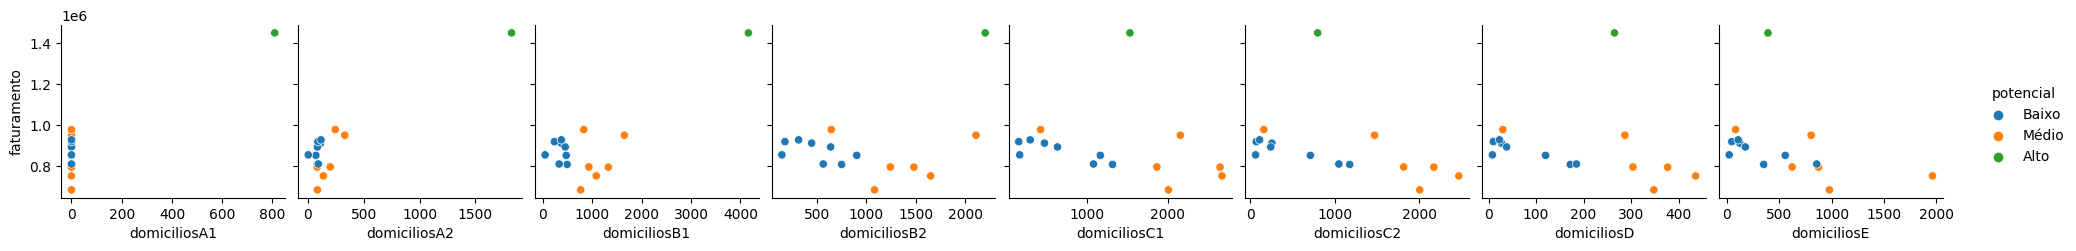

In [23]:
#@markdown
sns.pairplot(
    rio_gdf.query(
    "regiao_adm == 'ILHA DO GOVERNADOR'"
  ),
    x_vars = rio_gdf.loc[:, "domiciliosA1":"domiciliosE"].columns,
    y_vars="faturamento",
    hue="potencial"
)
plt.show()

A razão pela qual a região da Ilha do Governador possui um potencial alto, deve-se ao fato da existência do bairro Jardim Guanabara	que podemos notar tanto no gráfico quanto na tabela, possuir renda média maior e um número maior de classes A1 a B1.

In [24]:
#@markdown
rio_gdf.query(
  "regiao_adm == 'ILHA DO GOVERNADOR'"
).sort_values("potencial", ascending=False)[
    ["nome", "população", "faturamento", "rendaMedia", "potencial", "regiao_adm", "rp"]
]

nome  população  faturamento  rendaMedia  \
13                Jardim Guanabara    33122.0    1448872.0      6499.0   
1   Freguesia (Ilha Do Governador)    19984.0     796321.0      2125.0   
3                           Galeão    23620.0     684686.0      1740.0   
4                             Tauá    30403.0     752629.0      1704.0   
5                       Portuguesa    24529.0     950834.0      2511.0   
6                           Moneró     6381.0     978197.0      3669.0   
10                  Jardim Carioca    25549.0     795430.0      1943.0   
2                        Bancários    12864.0     808554.0      1962.0   
8                           Cocotá     5012.0     912281.0      2927.0   
16               Praia Da Bandeira     6116.0     893640.0      2699.0   
18                          Cacuia    11325.0     852714.0      2022.0   
22                    Pitangueiras    12088.0     810599.0      1688.0   
26                           Zumbi     2072.0     919451.0      3791.0   
27                         Ribeira     3629.0     928239.0      3420.0   
40            Cidade Universitária     1442.0     855182.0      1934.0   

   potencial          regiao_adm                  rp  
13      Alto  ILHA DO GOVERNADOR  Ilha do Governador  
1      Médio  ILHA DO GOVERNADOR  Ilha do Governador  
3      Médio  ILHA DO GOVERNADOR  Ilha do Governador  
4      Médio  ILHA DO GOVERNADOR  Ilha do Governador  
5      Médio  ILHA DO GOVERNADOR  Ilha do Governador  
6      Médio  ILHA DO GOVERNADOR  Ilha do Governador  
10     Médio  ILHA DO GOVERNADOR  Ilha do Governador  
2      Baixo  ILHA DO GOVERNADOR  Ilha do Governador  
8      Baixo  ILHA DO GOVERNADOR  Ilha do Governador  
16     Baixo  ILHA DO GOVERNADOR  Ilha do Governador  
18     Baixo  ILHA DO GOVERNADOR  Ilha do Governador  
22     Baixo  ILHA DO GOVERNADOR  Ilha do Governador  
26     Baixo  ILHA DO GOVERNADOR  Ilha do Governador  
27     Baixo  ILHA DO GOVERNADOR  Ilha do Governador  
40     Baixo  ILHA DO GOVERNADOR  Ilha do Governador

##### 2.2.1.2 Análise índices de desenvolvimento

Outra análise que podemos considerar é analisando os índices de desenvolvimento da região, para isso baixamos a tabela de [Índice de Desenvolvimento Humano](https://www.data.rio/documents/58186e41a2ad410f9099af99e46366fd) do Rio de Janeiro.

In [25]:
#@markdown
rio_idh_df = (
    pd.read_excel(
    "/content/Dados/rio-de-janeiro/idh_rio.xls", 
    "2000", 
    skiprows=6, 
    index_col=0, 
    nrows=127)
    .drop(columns=["Unnamed: 5", "Unnamed: 7"])
    .dropna()
    .assign(
        bairro= lambda d: d["Bairro ou grupo de bairros"].str.split(",")
    )
    .explode("bairro")
)

rio_idh_df["bairro"] = rio_idh_df["bairro"].str.strip().replace(
    "Parque Colúmbia", "Parque Columbia"
).replace(
    "Vila Cosmos", "Vila Kosmos"
).replace(
    "Freguesia", "Freguesia (Ilha do Governador)"
)

rio_gdf = rio_gdf.assign(
      nome_lower=lambda d: d["nome"].str.lower()
    ).merge(
    rio_idh_df.assign(
        nome_lower=lambda d: d["bairro"].str.lower()
    ), how="left"
).drop(columns=["nome_lower", "bairro"])

rio_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   codigo                                            160 non-null    float64 
 1   nome                                              160 non-null    object  
 2   cidade                                            160 non-null    object  
 3   estado                                            160 non-null    object  
 4   população                                         160 non-null    float64 
 5   popAte9                                           160 non-null    float64 
 6   popDe10a14                                        160 non-null    float64 
 7   popDe15a19                                        160 non-null    float64 
 8   popDe20a24                                        160 non-null    float64 
 9   po

findfont: Font family 'sansserif' not found.
findfont: Font family 'sansserif' not found.
findfont: Font family 'sansserif' not found.
findfont: Font family 'sansserif' not found.
findfont: Font family 'sansserif' not found.


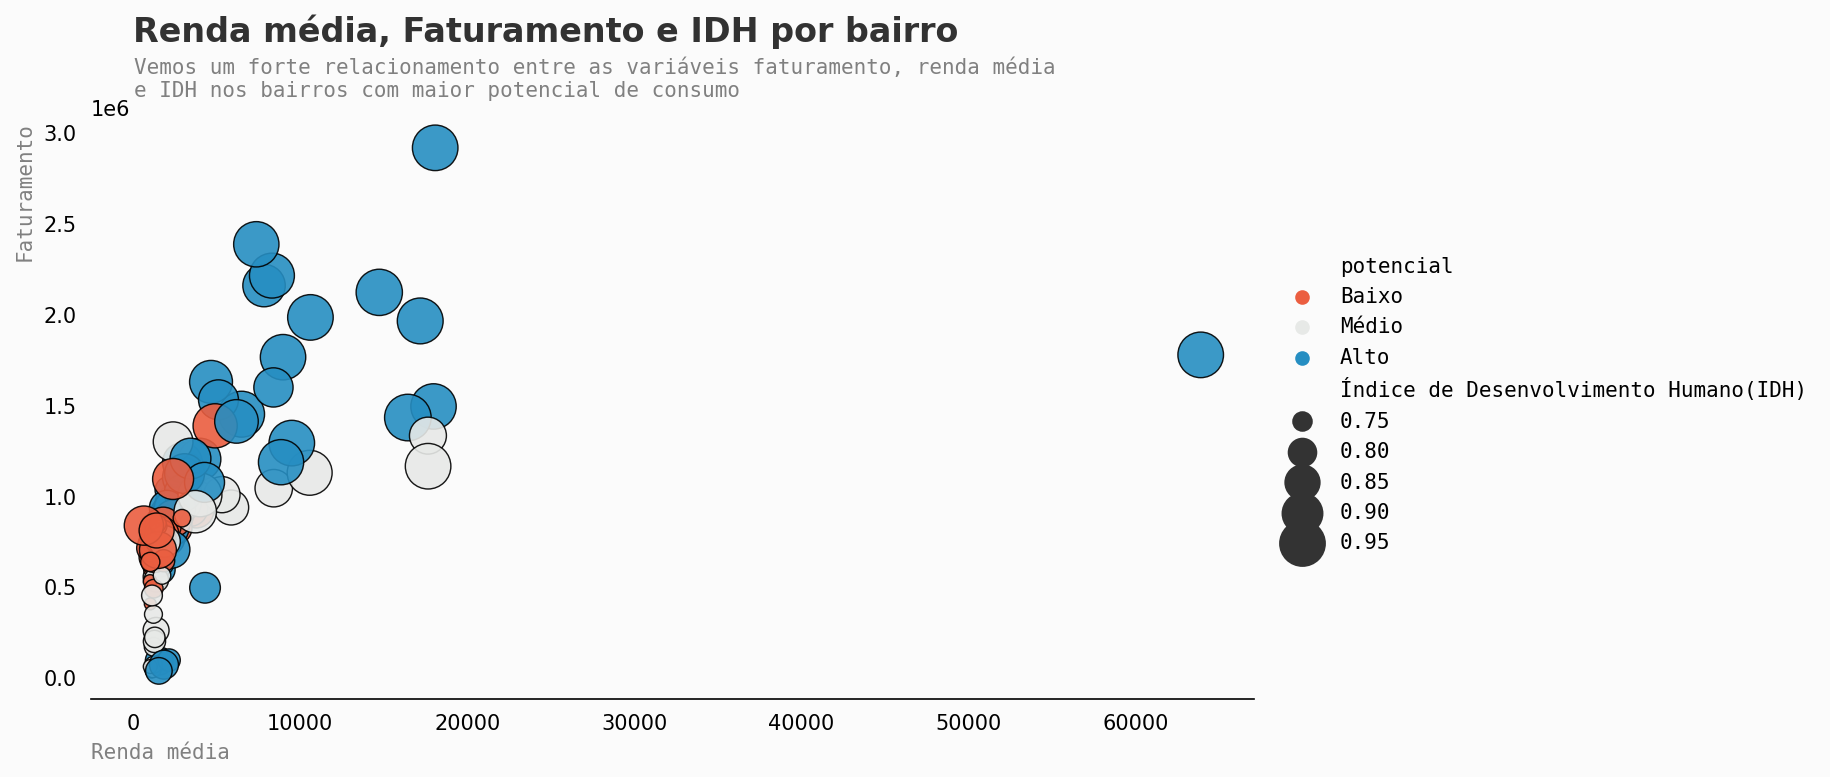

In [26]:
#@markdown
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c, "#e7e9e7", high_c]

ax.set_facecolor(background)
sns.scatterplot(
    data=rio_gdf, 
    x="rendaMedia", 
    y="faturamento",
    hue="potencial",
    palette=cmap, 
    alpha=0.9,
    ec="black",
    size="Índice de Desenvolvimento Humano Municipal (IDH)", 
    legend=True, 
    sizes=(5, 500)
)

ax.set_xlabel("Renda média",fontfamily='monospace',loc="left",color="gray")
ax.set_ylabel("Faturamento",fontfamily='monospace',loc="top",color="gray")
ax.tick_params(axis = "both", which = "major", labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
ax.text(
    0, 3_500_000,
    'Renda média, Faturamento e IDH por bairro',
    fontfamily='sansserif',
    fontsize=16,
    weight='bold',
    color='#323232'
)

ax.text(
    45,3_200_000,
    "Vemos um forte relacionamento entre as variáveis faturamento, renda média \ne IDH nos bairros com maior potencial de consumo",
    fontfamily='monospace',fontweight='light',
    fontsize=10,color='gray'
)


L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[4].set_text("Índice de Desenvolvimento Humano(IDH)")


ax.tick_params(axis="both", which="both", left=False, bottom=False, labelbottom=True) 

plt.show()

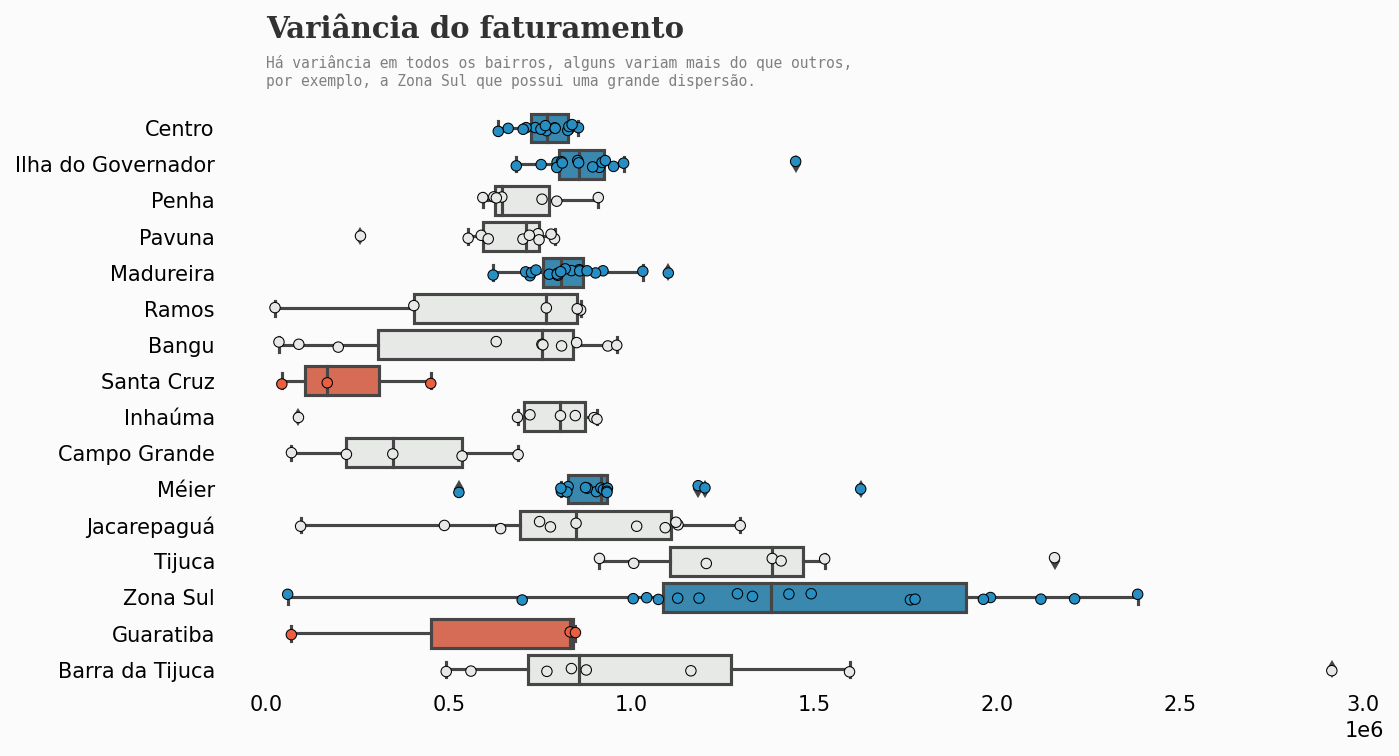

In [27]:
#@markdown
fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

ax.set_facecolor(background)

regions_adm = rio_gdf.groupby("rp")["faturamento"].sum().sort_values(ascending=False)

pal = {
    idx: high_c 
    if value >= regions_adm.iloc[4] 
    else low_c if value <=  regions_adm.iloc[-2] else "#e7e9e7"
    for idx, value in regions_adm.iteritems()
}

ax = sns.boxplot(x="faturamento", y ="rp", data=rio_gdf, palette=pal)

ax = sns.stripplot(data=rio_gdf, x="faturamento",  y ="rp", ec="black",linewidth=0.5,palette=pal)

for s in ["top","left","bottom", "right"]:
    ax.spines[s].set_visible(False)
    
ax.text(0,-2.5,"Variância do faturamento",fontfamily="serif",fontsize=14,weight="bold",color="#323232")
ax.text(2.2,-0.7,
"""
Há variância em todos os bairros, alguns variam mais do que outros, 
por exemplo, a Zona Sul que possui uma grande dispersão.
""",fontfamily="monospace",fontweight="light",fontsize=7,color="gray")
    
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis=u"both", which=u"both",length=0)

plt.show()

##### 2.2.1.3 Bairros por faturamento

Visão geral dos bairros do Rio de Janeiro de acordo com o faturamento.

In [28]:
#@markdown
rio_centroid = rio_gdf.dissolve().to_crs(crs=3857).centroid.to_crs(crs=4326)
map = folium.Map(
   height=400,
    location=[rio_centroid.y, rio_centroid.x], 
    zoom_start=10.45,
    tiles="cartodbpositron"
)

colormap = linear.YlGn_07.scale(0,3_000_000)

for name, group in rio_gdf.groupby("regiao_adm"):
  folium.GeoJson(
      group,
      name=name,
      style_function=lambda feature: {
           "fillColor": colormap(feature["properties"]["faturamento"]),
            "fillOpacity": 0.8,
            "weight": 0.8,
            "color": colormap(feature["properties"]["faturamento"]),
      },
      tooltip=folium.features.GeoJsonTooltip(["nome", "faturamento", "potencial"]),
  ).add_to(map)

colormap.caption = "Faturamento por bairro"
colormap.add_to(map)

folium.LayerControl(collapsed=False).add_to(map)
map

#### 2.2.2 Análise bairros de São Paulo

In [29]:
sp_df = df.query("cidade == 'São Paulo'")
rj_df = (df
         .query("cidade == 'Rio de Janeiro'")
         .set_index("nome")
         .fillna(rio_gdf.set_index("nome", drop=False))
         .reset_index()
)
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 160 to 455
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   codigo        296 non-null    float64 
 1   nome          296 non-null    object  
 2   cidade        296 non-null    object  
 3   estado        296 non-null    object  
 4   população     296 non-null    float64 
 5   popAte9       296 non-null    float64 
 6   popDe10a14    296 non-null    float64 
 7   popDe15a19    296 non-null    float64 
 8   popDe20a24    296 non-null    float64 
 9   popDe25a34    296 non-null    float64 
 10  popDe35a49    296 non-null    float64 
 11  popDe50a59    296 non-null    float64 
 12  popMaisDe60   296 non-null    float64 
 13  domiciliosA1  296 non-null    float64 
 14  domiciliosA2  296 non-null    float64 
 15  domiciliosB1  296 non-null    float64 
 16  domiciliosB2  296 non-null    float64 
 17  domiciliosC1  296 non-null    float64 
 18  domicili

In [30]:
sp_df[sp_df["rendaMedia"].isna()]

codigo                   nome     cidade estado  população  popAte9  \
232  355030170.0             Eta Guaraú  São Paulo     SP        0.0      0.0   
361  355030227.0        Pico Do Jaraguá  São Paulo     SP        0.0      0.0   
376  355030167.0  Reserva Da Cantareira  São Paulo     SP        0.0      0.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
232         0.0         0.0         0.0         0.0  ...           0.0   
361         0.0         0.0         0.0         0.0  ...           0.0   
376         0.0         0.0         0.0         0.0  ...           0.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
232           0.0           0.0           0.0           0.0          0.0   
361           0.0           0.0           0.0           0.0          0.0   
376           0.0           0.0           0.0           0.0          0.0   

     domiciliosE  rendaMedia  faturamento  potencial  
232          0.0         NaN          NaN        NaN  
361          0.0         NaN          NaN        NaN  
376          0.0         NaN          NaN        NaN  

[3 rows x 24 columns]

Ao checar percebemos que dados faltantes correspondem a locais como reserva ambientais, parque estadual e estação de tratamento de água, podendo serem excluídos da nossa análise:

- Eta Guaraú - Corresponde a uma estação de tratamento de água [(Fonte)](https://tratamentodeagua.com.br/artigo/estacao-de-tratamento-de-agua-guarau/)
- Pico de Jaguará - Corresponde a um parque estadual [(Fonte)](https://www.picodojaragua.com.br/)
- Reserva da Cantareira - Em uma consulta, a região residêncial encontrada foi o Residencial Nova Cantareira localizado no Tucuruvi e não Reserva da Cantareira [(Fonte)](https://reservanovacantareira.com.br/).

In [31]:
sp_df = sp_df.dropna(subset=["rendaMedia"])
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 160 to 455
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   codigo        293 non-null    float64 
 1   nome          293 non-null    object  
 2   cidade        293 non-null    object  
 3   estado        293 non-null    object  
 4   população     293 non-null    float64 
 5   popAte9       293 non-null    float64 
 6   popDe10a14    293 non-null    float64 
 7   popDe15a19    293 non-null    float64 
 8   popDe20a24    293 non-null    float64 
 9   popDe25a34    293 non-null    float64 
 10  popDe35a49    293 non-null    float64 
 11  popDe50a59    293 non-null    float64 
 12  popMaisDe60   293 non-null    float64 
 13  domiciliosA1  293 non-null    float64 
 14  domiciliosA2  293 non-null    float64 
 15  domiciliosB1  293 non-null    float64 
 16  domiciliosB2  293 non-null    float64 
 17  domiciliosC1  293 non-null    float64 
 18  domicili

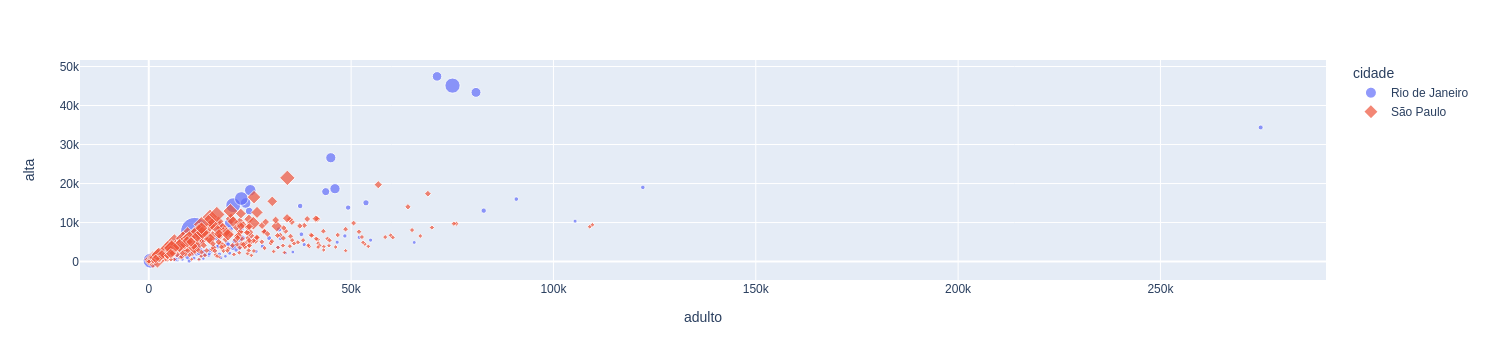

In [32]:
fig = px.scatter(
       pd.concat([
           rj_df.pipe(add_age_range).pipe(add_income_range)[[
            "nome",
            "cidade", 
            "estado",
            "jovem",
            "adulto",
            "idoso",
            "baixa",
            "media", 
            "alta", 
            "rendaMedia", 
            "faturamento", 
            "potencial"
            ]], 
           sp_df.pipe(add_age_range).pipe(add_income_range)[[
            "nome",
            "cidade", 
            "estado",
            "jovem",
            "adulto",
            "idoso",
            "baixa",
            "media", 
            "alta", 
            "rendaMedia", 
            "faturamento", 
            "potencial"
            ]]
        ], ignore_index=True), 
        x="adulto", 
        y="alta", 
        size="rendaMedia",
        hover_data=["nome", "cidade", "rendaMedia"], 
        color="cidade",
        symbol="cidade"
)
fig.show()

Podemos notar que os bairros com maior aderência a faixa etária e classes A1 e A2 se encontram no Rio de Janeiro, no entanto, vemos um tendência similar aos bairros de São Paulo e Rio de Janeiro.

#### 2.2.3 Salvar dados de São Paulo e Rio

In [33]:
sp_df.to_csv("/content/Dados/sp_df.csv", index=False)
rj_df.to_csv("/content/Dados/rj_df.csv", index=False)